# <font color='darkblue'> Project: European Soccer Database - Predictions and Betting Odds</font> 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Project:-European-Soccer-Database---Predictions-and-Betting-Odds" data-toc-modified-id="-Project:-European-Soccer-Database---Predictions-and-Betting-Odds-1"><font color="darkblue"> Project: European Soccer Database - Predictions and Betting Odds</font></a></span><ul class="toc-item"><li><span><a href="#Introduction-to-the-Dataset" data-toc-modified-id="Introduction-to-the-Dataset-1.1">Introduction to the Dataset</a></span></li><li><span><a href="#European-Soccer-Dataset---SQL-Exploration" data-toc-modified-id="European-Soccer-Dataset---SQL-Exploration-1.2">European Soccer Dataset - SQL Exploration</a></span></li><li><span><a href="#Research-questions" data-toc-modified-id="Research-questions-1.3">Research questions</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1.4">Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#General-Properties" data-toc-modified-id="General-Properties-1.4.1">General Properties</a></span></li><li><span><a href="#Data-Cleaning-and-Adjustments" data-toc-modified-id="Data-Cleaning-and-Adjustments-1.4.2">Data Cleaning and Adjustments</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.5">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Research-Question-1:--What-are-the-probability-of-winning-based-on-the-team-location:-Home-vs-Away?" data-toc-modified-id="Research-Question-1:--What-are-the-probability-of-winning-based-on-the-team-location:-Home-vs-Away?-1.5.1">Research Question 1:  What are the probability of winning based on the team location: Home vs Away?</a></span></li><li><span><a href="#Research-Question-2:-Are-those-probabilities-similar-across-all-the-leagues?" data-toc-modified-id="Research-Question-2:-Are-those-probabilities-similar-across-all-the-leagues?-1.5.2">Research Question 2: Are those probabilities similar across all the leagues?</a></span></li><li><span><a href="#Research-Question-3:-How-accurate-are-the-betting-odds-from-Bet365?" data-toc-modified-id="Research-Question-3:-How-accurate-are-the-betting-odds-from-Bet365?-1.5.3">Research Question 3: How accurate are the betting odds from Bet365?</a></span></li><li><span><a href="#Research-Question-4:-Which-team-has-the-highest-winning-ratio-within-each-league-for-the-2015/2016-season?" data-toc-modified-id="Research-Question-4:-Which-team-has-the-highest-winning-ratio-within-each-league-for-the-2015/2016-season?-1.5.4">Research Question 4: Which team has the highest winning ratio within each league for the 2015/2016 season?</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.6">Conclusions</a></span></li></ul></li></ul></div>

<a id='intro'></a> 
## Introduction to the Dataset

This project focuses on analyzing the <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a> provided by Kaggle. The database has extensive information about more than 25,000 soccer matches in Europe from 2008 to 2016. I have extracted selected information using <a href="https://sqlitebrowser.org"> DB Browser for SQLite</a> and stored it in a CSV file to be used within this notebook (I also included a short script to run the SQL query from this notebook). The section below briefly covers the SQL exploratory analysis carried out to decide which data will be used in this investigation.

The objective of this project is to develop some understanding on the probabilities for a team to win and to compare the observations with the betting odds from Bet365 (B365).

<a id='SQL'></a>
## European Soccer Dataset - SQL Exploration
The database provided by Kaggle has  interesting information about soccer matches in Europe. The first step on this investigation was to explore the SQL database and get familiar with the fields and the compiled data. Based on that exploration, I chose to create a SQL query that will pull the league, season, teams name (home and away), as well as the betting odds for <a href="https://www.bet365.com">Bet365</a> (one of the largest online gambling company in the United Kingdom).

In the SQL query, I created 2 subqueries to pull the names for the home and away teams (since the main table only have the teams ID) and added some key parameters for this investigation. Below is the description for each column used in this analysis:
<br>
<br>

<li> <b>date_match:</b> Date of the match. Format: YYYY-MM-DD</li>
<li> <b>season:</b> Tournament season</li>
<li> <b>League:</b> League for the teams on the selected match
<li> <b>home_team:</b> Team playing at home</li>
<li> <b>away_team:</b> Visiting team</li>
<li> <b>home_goal:</b> Goals scored by the home team</li>
<li> <b>away_goal:</b> Goals scored by the visiting team</li>
<li> <b>B365H:</b> Bet365 betting odds for the home team</li>
<li> <b>B365A:</b> Bet365 betting odds for the visiting team</li>
<li> <b>B365D:</b> Bet365 betting odds for draw match</li>

**SQL for Python:** I have also included the database together with this notebook and below is the python code in case the reader want to modify the query in the future for additional analysis. The code below was adapted from <a href=https://www.dataquest.io/blog/python-pandas-databases/>dataquest.io</a>.

>The output of the SQL query is already stored in the "EU_selected_data.csv" file, so there is no need to run the cell below if the user does not have sqlite3 module installed.

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect('EU_soccer_db.sqlite')
eu_data=pd.read_sql_query(
('WITH h_team AS (SELECT t.team_long_name as home_team, m.id id_t'
' FROM team t'
' JOIN match m'
' ON m.home_team_api_id=t.team_api_id),'
' a_team AS (SELECT t.team_long_name as away_team, m.id id_t'
' FROM team t'
' JOIN match m'
' ON m.away_team_api_id=t.team_api_id)'
' SELECT m.date date_match, m.season, l.name league, ht.home_team,'
' a_t.away_Team, m.home_team_goal home_goal, m.away_team_goal away_goal,'
' m.B365H, m.B365A, m.B365D'
' FROM League as l'
' JOIN match m'
' ON l.id = m.league_id'
' JOIN h_team ht'
' ON ht.id_t=m.id'
' JOIN a_team a_t'
' ON a_t.id_t=m.id'
' ORDER BY date_match'),con)
con.close()
eu_data.to_csv('EU_selected_data.csv',index=False) #Saving query output to csv and removing the index column


## Research questions
Below are the questions that will be answer during this analysis:

1. What are the probability of winning based on the team location: Home vs Away?
2. Are those probabilities similar across all the leagues?
3. How accurate are the betting odds from Bet365?
4. Which team has the highest winning ratio within each league for the 2015/2016 season?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Importing the needed modules: Pandas, Numpy, Matplotlib and Seaborn. Also loading the selected data from the CSV file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

df=pd.read_csv('EU_selected_data.csv')
df.head()


,date_match,season,league,home_team,away_team,home_goal,away_goal,B365H,B365A,B365D
0,2008-07-18 00:00:00,2008/2009,Switzerland Super League,BSC Young Boys,FC Basel,1,2,NaN,NaN,NaN
1,2008-07-19 00:00:00,2008/2009,Switzerland Super League,FC Aarau,FC Sion,3,1,NaN,NaN,NaN
2,2008-07-20 00:00:00,2008/2009,Switzerland Super League,FC Luzern,FC Vaduz,1,2,NaN,NaN,NaN
3,2008-07-20 00:00:00,2008/2009,Switzerland Super League,Neuchâtel Xamax,FC Zürich,1,2,NaN,NaN,NaN
4,2008-07-23 00:00:00,2008/2009,Switzerland Super League,FC Basel,Grasshopper Club Zürich,1,0,NaN,NaN,NaN


Updating data types and checking other properties as follow:
<br>
<br>
<li> Data types will be adjusted as needed</li>
<li> The dataset will be checked for duplicate and delete them if any</li>
<li> The data will be checked for null values</li>


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_match  25979 non-null  object 
 1   season      25979 non-null  object 
 2   league      25979 non-null  object 
 3   home_team   25979 non-null  object 
 4   away_team   25979 non-null  object 
 5   home_goal   25979 non-null  int64  
 6   away_goal   25979 non-null  int64  
 7   B365H       22592 non-null  float64
 8   B365A       22592 non-null  float64
 9   B365D       22592 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 2.0+ MB


The date_match should be converted from string to datetime.<br>
It seems that there are some null values in the Bet365 betting columns that should be removed before analyzing the betting odds


In [4]:
df.nunique()

date_match    1694
season           8
league          11
home_team      296
away_team      296
home_goal       11
away_goal       10
B365H          121
B365A          115
B365D           72
dtype: int64

By checking the unique values in the file, we can conclude that there are 8 seasons and 11 league in the database. Also, there seems to be 296 teams. The fact that the count for the home team and away team are the same is an indication of the consistency of the database.

In [5]:
df.duplicated().sum()

0

No duplicates found! :)

In [6]:
df.isnull().sum()

date_match       0
season           0
league           0
home_team        0
away_team        0
home_goal        0
away_goal        0
B365H         3387
B365A         3387
B365D         3387
dtype: int64

There are 3387 null values in the betting columns. Those values will be removed and the clean database will be saved as df_bet to be analyzed later.

### Data Cleaning and Adjustments

A new column will be added to determine the outcome of each match based on the home_goal and away_goals as shown below:

><li> home_goal > away_goal = Home</li>
><li> home_goal < away_goal = Away</li>
><li> home_goal = away_goal = Draw</li>




In [7]:
conditions = [(df['home_goal'] > df['away_goal']), df['home_goal'] == df['away_goal']]
choices = ['Home', 'Draw']
df['winner'] = np.select(conditions, choices, default='Away') #a new column will be added based on the conditions explained above

In [8]:
df.head(1)

,date_match,season,league,home_team,away_team,home_goal,away_goal,B365H,B365A,B365D,winner
0,2008-07-18 00:00:00,2008/2009,Switzerland Super League,BSC Young Boys,FC Basel,1,2,NaN,NaN,NaN,Away


In [9]:
df['date_match']=pd.to_datetime(df.date_match)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_match  25979 non-null  datetime64[ns]
 1   season      25979 non-null  object        
 2   league      25979 non-null  object        
 3   home_team   25979 non-null  object        
 4   away_team   25979 non-null  object        
 5   home_goal   25979 non-null  int64         
 6   away_goal   25979 non-null  int64         
 7   B365H       22592 non-null  float64       
 8   B365A       22592 non-null  float64       
 9   B365D       22592 non-null  float64       
 10  winner      25979 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 2.2+ MB


In [10]:
df_bet=df.dropna().copy() #using the copy() method to create a copy and avoid the "settingwithcopy" warning when we add a new column to this dataframe
df_bet.count()

date_match    22592
season        22592
league        22592
home_team     22592
away_team     22592
home_goal     22592
away_goal     22592
B365H         22592
B365A         22592
B365D         22592
winner        22592
dtype: int64

In [11]:
df_bet.head()

,date_match,season,league,home_team,away_team,home_goal,away_goal,B365H,B365A,B365D,winner
22,2008-08-09,2008/2009,France Ligue 1,AJ Auxerre,FC Nantes,2,1,2.10,3.75,3.1,Home
23,2008-08-09,2008/2009,France Ligue 1,Girondins de Bordeaux,SM Caen,2,1,1.57,6.50,3.6,Home
24,2008-08-09,2008/2009,France Ligue 1,Le Havre AC,OGC Nice,1,0,2.30,3.40,3.0,Home
25,2008-08-09,2008/2009,France Ligue 1,Le Mans FC,FC Lorient,0,1,2.10,3.80,3.1,Away
26,2008-08-09,2008/2009,France Ligue 1,AS Monaco,Paris Saint-Germain,1,0,2.40,3.10,3.1,Home


<a id='eda'></a>
## Exploratory Data Analysis

Now that our dataset is ready, we can proceed to answer the questions posted earlier

### Research Question 1:  What are the probability of winning based on the team location: Home vs Away?


To answer our first question, we will calculate the probability of winning for each category (Home, Away and Draw). For that we will see the count for each category and divide it by the total number of matches. The data will be plotted in a bar chart to have a clear visualization on which category has the highest winning probability.

In [12]:
winner_category_total=df.winner.value_counts()
winner_category_total

Home    11917
Away     7466
Draw     6596
Name: winner, dtype: int64

In [13]:
total_num_match=df.winner.value_counts().sum()
prob_winner = winner_category_total/total_num_match
prob_winner

Home    0.458717
Away    0.287386
Draw    0.253897
Name: winner, dtype: float64

Below we will define a function for plotting bar charts since that will be used few times on this analysis

In [14]:
def plot_bar(dataframe_1D,label_y,label_x,titlelabel):
    sns.barplot(x=dataframe_1D.index, y=dataframe_1D.values).set(ylabel=label_y, xlabel=label_x,title=titlelabel);
    return;
    

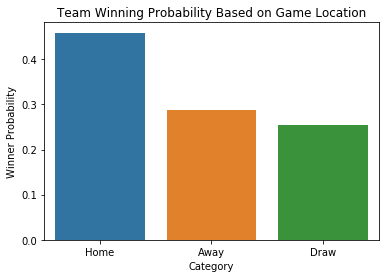

In [15]:
plot_bar(prob_winner,'Winner Probability', 'Category', 'Team Winning Probability Based on Game Location')

Based on the numbers above, overall, it seems that the home team has 46% probability of winning. That number is based on the matches for all the leagues. Let's see if this is consistent within the leagues. 

It is important to clarify that **correlation does not imply causation**; this is just an observation and it could be attributed to other possible factors not just the location of the game.


### Research Question 2: Are those probabilities similar across all the leagues?

We are counting each category (Home, Away and Draw) for each league and dividing by the total number of matches per league. Then we will add the probability into a new data frame

In [16]:
home_cnt=df.query('winner=="Home"').groupby('league').count()
away_cnt=df.query('winner=="Away"').groupby('league').count()
draw_cnt=df.query('winner=="Draw"').groupby('league').count()
total_cnt=df.groupby('league').count()
league_prob=pd.DataFrame(index=total_cnt.index)
league_prob['home']=home_cnt['winner']/total_cnt['winner']
league_prob['away']=away_cnt['winner']/total_cnt['winner']
league_prob['draw']=draw_cnt['winner']/total_cnt['winner']
league_prob.head()

,home,away,draw
league,,,
Belgium Jupiler League,0.468750,0.285301,0.245949
England Premier League,0.457237,0.285197,0.257566
France Ligue 1,0.447039,0.270395,0.282566
Germany 1. Bundesliga,0.452206,0.303922,0.243873
Italy Serie A,0.466357,0.269804,0.263838


In [17]:
league_prob.shape

(11, 3)

We will flatten the data set and then we will used melt to put it in a format that can be plotted by seaborn

In [18]:
league_prob_flat=pd.DataFrame(league_prob.to_records()) #reshaping the data to remove the multi-index using to_records() function
league_prob_flat.head()

,league,home,away,draw
0,Belgium Jupiler League,0.468750,0.285301,0.245949
1,England Premier League,0.457237,0.285197,0.257566
2,France Ligue 1,0.447039,0.270395,0.282566
3,Germany 1. Bundesliga,0.452206,0.303922,0.243873
4,Italy Serie A,0.466357,0.269804,0.263838


In [19]:
league_prob_melt=league_prob_flat.melt('league', var_name='Winner_Location',  value_name='Probability') #adjusting the dataframe to be plotted by seaborn
league_prob_melt.head()

,league,Winner_Location,Probability
0,Belgium Jupiler League,home,0.468750
1,England Premier League,home,0.457237
2,France Ligue 1,home,0.447039
3,Germany 1. Bundesliga,home,0.452206
4,Italy Serie A,home,0.466357


The data will be plotted in a series of line charts to check if the trends are flat between the leagues or if specific league have higher or lower probability. We will make a plot from home, away and draw.

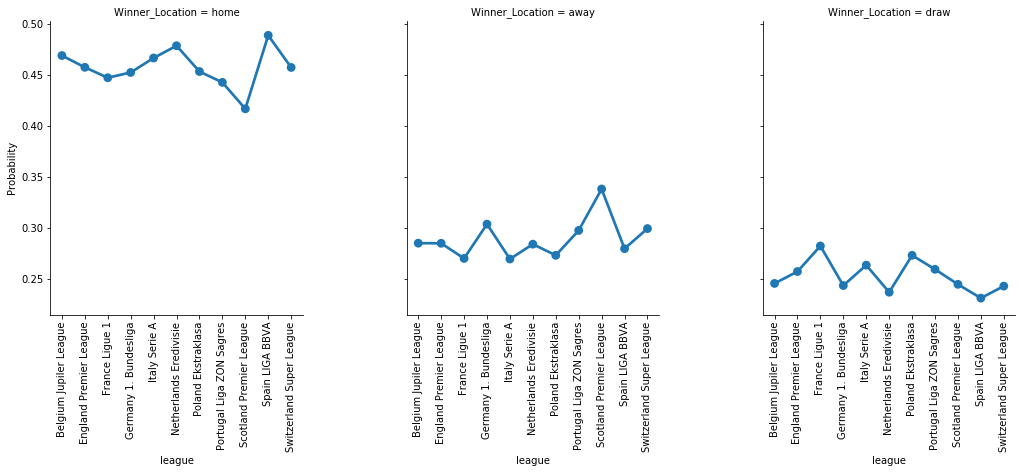

In [20]:
League_prob_fig = sns.catplot(x='league', y='Probability', col='Winner_Location', col_wrap=3, data=league_prob_melt, kind='point');
League_prob_fig.set_xticklabels(rotation=90);

In [21]:
league_prob_flat.home.min()

0.4166666666666667

In [22]:
league_prob_flat.home.max()

0.48848684210526316

Based on the figures above, it looks like the home team usually has 41% to 49% probability of winning regardless of the league. The draw and away probabilities are also similar to the average presented above.

It is important to clarify that **correlation does not imply causation**; this is just an observation and it could be attributed to other possible factors not just the location of the game.

### Research Question 3: How accurate are the betting odds from Bet365?

For betting odds, the lowest number is the most likely outcome of the match. For more details, please check <a href=https://www.gamblingsites.com/sports-betting/introduction/value-odds/>Betting odds</a>

In [23]:
df_bet.head()

,date_match,season,league,home_team,away_team,home_goal,away_goal,B365H,B365A,B365D,winner
22,2008-08-09,2008/2009,France Ligue 1,AJ Auxerre,FC Nantes,2,1,2.10,3.75,3.1,Home
23,2008-08-09,2008/2009,France Ligue 1,Girondins de Bordeaux,SM Caen,2,1,1.57,6.50,3.6,Home
24,2008-08-09,2008/2009,France Ligue 1,Le Havre AC,OGC Nice,1,0,2.30,3.40,3.0,Home
25,2008-08-09,2008/2009,France Ligue 1,Le Mans FC,FC Lorient,0,1,2.10,3.80,3.1,Away
26,2008-08-09,2008/2009,France Ligue 1,AS Monaco,Paris Saint-Germain,1,0,2.40,3.10,3.1,Home


Now we will add a new column (bet_exp) with the expected outcome of the match based on the lowest number from the three betting columns (B365H, B365A and B365D)

In [24]:
conditions = [np.logical_and(df_bet['B365H'] < df_bet['B365A'], df_bet['B365H'] < df_bet['B365D']),np.logical_and(df_bet['B365A'] < df_bet['B365H'], df_bet['B365A'] < df_bet['B365D']), np.logical_and(df_bet['B365D'] < df_bet['B365H'], df_bet['B365D'] < df_bet['B365A'])]
choices = ['Home', 'Away', 'Draw']
df_bet['bet_exp'] = np.select(conditions, choices, default='Error')

In [25]:
df_bet.head()

,date_match,season,league,home_team,away_team,home_goal,away_goal,B365H,B365A,B365D,winner,bet_exp
22,2008-08-09,2008/2009,France Ligue 1,AJ Auxerre,FC Nantes,2,1,2.10,3.75,3.1,Home,Home
23,2008-08-09,2008/2009,France Ligue 1,Girondins de Bordeaux,SM Caen,2,1,1.57,6.50,3.6,Home,Home
24,2008-08-09,2008/2009,France Ligue 1,Le Havre AC,OGC Nice,1,0,2.30,3.40,3.0,Home,Home
25,2008-08-09,2008/2009,France Ligue 1,Le Mans FC,FC Lorient,0,1,2.10,3.80,3.1,Away,Home
26,2008-08-09,2008/2009,France Ligue 1,AS Monaco,Paris Saint-Germain,1,0,2.40,3.10,3.1,Home,Home


Based on that column, we will count how many time the expected outcome predicts the actual outcome of the match and we will calculate the probability by dividing it by the total numner of games.

In [26]:
df_bet.count()['bet_exp']

22592

In [27]:
accurate_exp_count=df_bet.query('winner == bet_exp').count()['bet_exp']
total_bet_count=df_bet.count()['bet_exp']
accurate_ratio=accurate_exp_count/total_bet_count
accurate_ratio

0.5304975212464589

Surprisingly, the accuracy of the betting odds are not much higher than our previous prediction based on location. Let's add the betting odds accuracy ratio to our location probability plot. For that we will use the function we created earlier: **plot_bar**

In [28]:
prob_winner

Home    0.458717
Away    0.287386
Draw    0.253897
Name: winner, dtype: float64

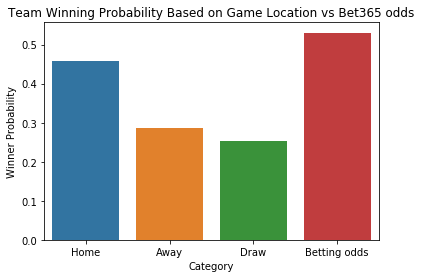

In [29]:
prob_winner['Betting odds']=accurate_ratio
plot_bar(prob_winner,'Winner Probability', 'Category', 'Team Winning Probability Based on Game Location vs Bet365 odds')


This is an interesting observation, however "correlation does not imply causation". This observation could be attributed to other possible factors not accounted in this evaluation.

### Research Question 4: Which team has the highest winning ratio within each league for the 2015/2016 season?

To answer this question, we will create a dataframe with the total number of won games for each team; it will account the matches won as home team as well as the matches won while visiting other teams. Two dataset will be created, one for the teams that won at home and the other for the teams that won away; the two dataset will be merged (concat) to have a dataframe with all the winning teams. The columns for the new dataframe will be renamed and unnecessary columns will be removed.

In [30]:
df_home_winner = df.loc[df['winner']=='Home'].reset_index() #reseting index to get a new dataframe
df_away_winner = df.loc[df['winner']=='Away'].reset_index()
df_home_winner.rename(columns={'home_team':'winner_team'}, inplace=True)
df_away_winner.rename(columns={'away_team':'winner_team'}, inplace=True)
df_home_winner.drop(columns=['index','away_team','B365H','B365A','B365D'], inplace=True)
df_away_winner.drop(columns=['index','home_team','B365H','B365A','B365D'], inplace=True)
df_winner=pd.concat([df_home_winner,df_away_winner],sort=False) #merging the two dataset to account for the matches won at home as well as away
df_winner.rename(columns={'winner':'winner_location'}, inplace=True)
df_winner.head()



,date_match,season,league,winner_team,home_goal,away_goal,winner_location
0,2008-07-19,2008/2009,Switzerland Super League,FC Aarau,3,1,Home
1,2008-07-23,2008/2009,Switzerland Super League,FC Basel,1,0,Home
2,2008-07-23,2008/2009,Switzerland Super League,FC Zürich,1,0,Home
3,2008-07-24,2008/2009,Switzerland Super League,FC Sion,2,1,Home
4,2008-07-26,2008/2009,Switzerland Super League,FC Basel,2,0,Home


To calculate the winning ratio for each team, we will count the number of games they won and divide them by the total number of matches. Then the dataframe need to be unstacked to be able to get the team with the highest ratio per league on the 2015/2016 season.

In [31]:
win_count_season=df_winner.groupby(['league','season','winner_team']).count()['winner_location']
total_games_season=df.groupby(['league','season','home_team']).count()['winner']+df.groupby(['league','season','away_team']).count()['winner'] #adding the matches for each team when they played at home and the matches when they played as visiting team (away)
win_per_season=win_count_season/total_games_season
win_per_season

league                    season     winner_team            
Belgium Jupiler League    2008/2009  Beerschot AC               0.323529
                                     Club Brugge KV             0.529412
                                     FCV Dender EH              0.264706
                                     KAA Gent                   0.500000
                                     KRC Genk                   0.441176
                                                                  ...   
Switzerland Super League  2015/2016  FC Thun                    0.277778
                                     FC Vaduz                   0.194444
                                     FC Zürich                  0.194444
                                     Grasshopper Club Zürich    0.416667
                                     Lugano                     0.250000
Length: 1478, dtype: float64

In [32]:
wining_ratio_season=win_per_season.unstack(level=1)
wining_ratio_season

season                                            2008/2009  2009/2010  \
league                   winner_team                                     
Belgium Jupiler League   Beerschot AC              0.323529   0.321429   
                         Club Brugge KV            0.529412   0.607143   
                         FCV Dender EH             0.264706        NaN   
                         KAA Gent                  0.500000   0.500000   
                         KAS Eupen                      NaN        NaN   
...                                                     ...        ...   
Switzerland Super League FC Zürich                 0.666667   0.333333   
                         Grasshopper Club Zürich   0.333333   0.583333   
                         Lugano                         NaN        NaN   
                         Neuchâtel Xamax           0.277778   0.305556   
                         Servette FC                    NaN        NaN   

season                                            2010/2011  2011/2012  \
league                   winner_team                                     
Belgium Jupiler League   Beerschot AC              0.166667   0.300000   
                         Club Brugge KV            0.533333   0.633333   
                         FCV Dender EH                  NaN        NaN   
                         KAA Gent                  0.566667   0.566667   
                         KAS Eupen                 0.166667        NaN   
...                                                     ...        ...   
Switzerland Super League FC Zürich                 0.583333   0.323529   
                         Grasshopper Club Zürich   0.277778   0.205882   
                         Lugano                         NaN        NaN   
                         Neuchâtel Xamax           0.222222   0.388889   
                         Servette FC                    NaN   0.411765   

season                                            2012/2013  2013/2014  \
league                   winner_team                                     
Belgium Jupiler League   Beerschot AC              0.200000        NaN   
                         Club Brugge KV            0.500000        NaN   
                         FCV Dender EH                  NaN        NaN   
                         KAA Gent                  0.266667   0.500000   
                         KAS Eupen                      NaN        NaN   
...                                                     ...        ...   
Switzerland Super League FC Zürich                 0.444444   0.388889   
                         Grasshopper Club Zürich   0.555556   0.527778   
                         Lugano                         NaN        NaN   
                         Neuchâtel Xamax                NaN        NaN   
                         Servette FC               0.166667        NaN   

season                                            2014/2015  2015/2016  
league                   winner_team                                    
Belgium Jupiler League   Beerschot AC                   NaN        NaN  
                         Club Brugge KV            0.566667   0.700000  
                         FCV Dender EH                  NaN        NaN  
                         KAA Gent                  0.533333   0.566667  
                         KAS Eupen                      NaN        NaN  
...                                                     ...        ...  
Switzerland Super League FC Zürich                 0.416667   0.194444  
                         Grasshopper Club Zürich   0.305556   0.416667  
                         Lugano                         NaN   0.250000  
                         Neuchâtel Xamax                NaN        NaN  
                         Servette FC                    NaN        NaN  

[296 rows x 8 columns]

Now we will filtered the dataframe to select the highest ratio (max) per league for the 2015/2016 season. To accomplished that we will filtered the dataframe by the maximum value for each league on the 2015/2016 season.

In [33]:
Best_teams_2015_2016=(wining_ratio_season[wining_ratio_season['2015/2016'] == wining_ratio_season.groupby(level=[0])['2015/2016'].transform(max)])['2015/2016']
Best_teams_2015_2016


league                    winner_team        
Belgium Jupiler League    Club Brugge KV         0.700000
England Premier League    Leicester City         0.605263
France Ligue 1            Paris Saint-Germain    0.789474
Germany 1. Bundesliga     FC Bayern Munich       0.823529
Italy Serie A             Juventus               0.763158
Netherlands Eredivisie    PSV                    0.764706
Poland Ekstraklasa        Legia Warszawa         0.566667
                          Piast Gliwice          0.566667
Portugal Liga ZON Sagres  SL Benfica             0.852941
Scotland Premier League   Celtic                 0.684211
Spain LIGA BBVA           FC Barcelona           0.763158
Switzerland Super League  FC Basel               0.722222
Name: 2015/2016, dtype: float64

In [34]:
Best_teams_2015_2016.idxmax()

('Portugal Liga ZON Sagres', 'SL Benfica')

The table above shows the best team for each league in the 2015/2016 season. From those, Poland has two teams with the same ratio. From those, the team with the highest ratio is SL Benfica from Portugal.

<a id='conclusions'></a>
## Conclusions

Based on the data presented, teams playing at their home stadium have higher probability of winning, regardless of which league they belong. 

The accuracy of the Bet365 predictions was 53%, not significantly far from the odds of winning while playing on the home stadium (46%). 

In the 2015/2016, SL Benfica from Portugal Liga ZON Sagres had the highest winning ratio, the team won 85% of the played games.

While those are interesting observation, it is important to keep in mind that **correlation does not imply causation**. There are other factors not considered in this study that could have influence the correlations.